In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_c11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        34.5641 (32.6470, 38.7141) (32.2776, 37.9558)  5.6782 (Jnode 202)\n',
 't_n104        23.0921 (18.7535, 28.2537) (18.5493, 27.9807)  9.4315 (Jnode 201)\n',
 't_n105        22.2535 (18.0904, 27.2175) (17.8072, 26.8669)  9.0597 (Jnode 200)\n',
 't_n106        19.6340 (15.9973, 23.9893) (15.8370, 23.7677)  7.9307 (Jnode 199)\n',
 't_n107        19.0256 (15.5094, 23.2282) (15.3156, 22.9873)  7.6717 (Jnode 198)\n',
 't_n108        17.8670 (14.5783, 21.8039) (14.4298, 21.6031)  7.1732 (Jnode 197)\n',
 't_n109         7.5080 ( 6.3565,  8.9458) ( 6.2804,  8.8420)  2.5616 (Jnode 196)\n',
 't_n110         7.4458 ( 6.3057,  8.8690) ( 6.2335,  8.7682)  2.5347 (Jnode 195)\n',
 't_n111         7.2395 ( 6.1348,  8.6194) ( 6.0514,  8.5105)  2.4591 (Jnode 194)\n',
 't_n112         6.9912 ( 5.9256,  8.3193) ( 5.8512,  8.2183)  2.3671 (Jnode 193)\n',
 't_n113         6.6697 ( 5.6625,  7.9232) ( 5.5841,  7.8251)  2.2409 (Jnode 192)\n',
 't_n114         4.7723 ( 4.1362,  5.5355) ( 4.1034,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[34.5641,
 23.0921,
 22.2535,
 19.634,
 19.0256,
 17.867,
 7.508,
 7.4458,
 7.2395,
 6.9912,
 6.6697,
 4.7723,
 3.2722,
 2.444,
 1.2915,
 5.0722,
 4.3573,
 6.9324,
 4.5472,
 6.6478,
 5.3035,
 4.3018,
 3.5051,
 6.4345,
 6.0667,
 1.574,
 7.1356,
 6.4354,
 4.9191,
 3.9114,
 4.4385,
 4.0355,
 3.3756,
 3.1423,
 16.6155,
 13.0639,
 18.0849,
 16.447,
 15.2654,
 12.4816,
 6.4526,
 12.0253,
 10.5409,
 9.3703,
 7.9985,
 14.8596,
 13.6416,
 3.2118,
 1.4122,
 20.8071,
 19.5234,
 17.5718,
 16.9564,
 18.2746,
 12.0069,
 14.9173,
 11.7603,
 22.3369,
 20.8443,
 18.825,
 17.7582,
 15.006,
 9.9358,
 13.2759,
 18.5301,
 5.4515,
 18.6822,
 11.8086,
 11.415,
 11.1244,
 10.4738,
 9.5762,
 9.1211,
 8.7828,
 8.3855,
 7.4489,
 6.439,
 5.3597,
 7.5768,
 7.1369,
 5.6627,
 6.4375,
 8.2303,
 7.5878,
 7.0131,
 5.9942,
 4.1392,
 7.7627,
 6.9691,
 6.1621,
 9.0996,
 8.6348,
 8.1868,
 7.2433,
 5.3071,
 8.1229,
 4.517,
 3.6212,
 1.3535,
 11.3907,
 9.6585]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_C11.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[34.5843,
 24.6211,
 23.1297,
 20.3823,
 19.485,
 17.562,
 8.2721,
 8.1552,
 7.7248,
 7.293,
 6.8623,
 4.8851,
 3.3773,
 2.4263,
 1.4597,
 5.2652,
 4.3197,
 7.2792,
 4.7103,
 6.8747,
 5.4017,
 4.287,
 3.8915,
 6.7628,
 6.2403,
 2.1053,
 7.6389,
 6.7138,
 5.1272,
 4.034,
 4.6812,
 4.1116,
 3.3241,
 3.6543,
 16.0649,
 13.0184,
 18.1746,
 16.229,
 14.6077,
 11.836,
 6.5473,
 11.6768,
 9.8455,
 8.4643,
 6.9548,
 14.5987,
 13.1191,
 3.9442,
 1.8452,
 20.6544,
 18.7267,
 16.1752,
 15.8509,
 17.7041,
 11.7952,
 14.4502,
 10.9565,
 23.6344,
 21.7951,
 19.3147,
 17.6954,
 14.9753,
 10.5674,
 12.8524,
 18.8516,
 7.1018,
 19.1364,
 15.998,
 14.9581,
 14.0743,
 13.0239,
 11.6706,
 10.9215,
 10.2706,
 9.4761,
 8.1634,
 6.8599,
 5.6535,
 8.3668,
 7.7179,
 6.0399,
 6.588,
 9.4347,
 8.4353,
 7.5013,
 6.2862,
 4.3335,
 8.5515,
 7.5466,
 6.4526,
 10.7044,
 9.8181,
 8.9109,
 7.6059,
 5.3037,
 9.2149,
 6.5046,
 5.034,
 2.0811,
 15.2773,
 12.8098]

In [12]:
posterior_mean_iqtree

[34.5641,
 23.0921,
 22.2535,
 19.634,
 19.0256,
 17.867,
 7.508,
 7.4458,
 7.2395,
 6.9912,
 6.6697,
 4.7723,
 3.2722,
 2.444,
 1.2915,
 5.0722,
 4.3573,
 6.9324,
 4.5472,
 6.6478,
 5.3035,
 4.3018,
 3.5051,
 6.4345,
 6.0667,
 1.574,
 7.1356,
 6.4354,
 4.9191,
 3.9114,
 4.4385,
 4.0355,
 3.3756,
 3.1423,
 16.6155,
 13.0639,
 18.0849,
 16.447,
 15.2654,
 12.4816,
 6.4526,
 12.0253,
 10.5409,
 9.3703,
 7.9985,
 14.8596,
 13.6416,
 3.2118,
 1.4122,
 20.8071,
 19.5234,
 17.5718,
 16.9564,
 18.2746,
 12.0069,
 14.9173,
 11.7603,
 22.3369,
 20.8443,
 18.825,
 17.7582,
 15.006,
 9.9358,
 13.2759,
 18.5301,
 5.4515,
 18.6822,
 11.8086,
 11.415,
 11.1244,
 10.4738,
 9.5762,
 9.1211,
 8.7828,
 8.3855,
 7.4489,
 6.439,
 5.3597,
 7.5768,
 7.1369,
 5.6627,
 6.4375,
 8.2303,
 7.5878,
 7.0131,
 5.9942,
 4.1392,
 7.7627,
 6.9691,
 6.1621,
 9.0996,
 8.6348,
 8.1868,
 7.2433,
 5.3071,
 8.1229,
 4.517,
 3.6212,
 1.3535,
 11.3907,
 9.6585]

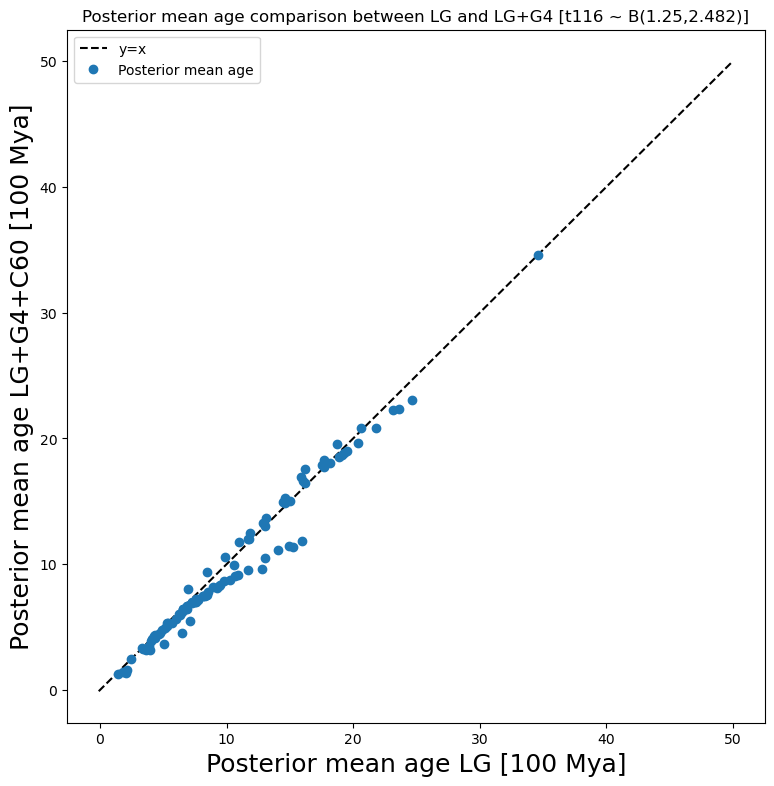

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t116 ~ B(1.25,2.482)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_c11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')